Project for Conway's Game of Life

**1. Introduction**

In this project, we'll start by implementing the basic rules and creating some simple examples. 
Then, we'll explore more complex patterns like still lifes, oscillators, and spaceships, analyzing their evolution in terms of cycles, occupancy, replication, and speed. 

**2. Implementation**


Implementing Update Function: The core of the implementation involves writing the update_grid function, which applies the rules of the Game of Life to update the state of each cell based on its neighbors. This function will iterate over each cell in the grid, count its live neighbors, and apply the rules accordingly to generate the next generation of the grid.

Initializing Patterns:ill define functions to initialize different patterns on the grid. These patterns include a random pattern, glider pattern, beehive pattern, toad pattern, and beacon pattern. Each pattern will be represented by a specific arrangement of live and dead cells on the grid.

Updating Plot with Animation: We will create a function, update_plot, to update the plot for each frame of the animation. This function will utilize the update_grid function to generate successive generations of the grid and update the plot accordingly.

Generating Animations: Finally, we will loop over the different patterns and grid sizes, initializing the grid with each pattern, creating an animation for each combination of pattern and grid size, and saving the animations as GIF files.

**Japheth Bidayan Duut -- Implementation of game rules and testing with simple examples**

**Tonny Kipkosgei -- Analyses of evolution of patterns**



**a. Implementing the game rules and testing with basic examples**

Defining a 3x3 window that would be passed through the grid to extract the number of life neighbors each cell has.
And then applying the following rules.
For a live cell if the number of live neighbors is less than 2 or greater than 3, it dies. Otherwise it stays alive.
For a dead cell if the number of live neighbors is exactly 3 it comes alive. Otherwise, it stays dead. 
We use np.copy() because we want to return a copy of the original grid which in it self is a new generation and its own entity.
This would help us create the animated gifs by combining multiple grids.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Function to update the grid based on the rules of the Game of Life
def update_grid(grid):
    new_grid = np.copy(grid)
    for i in range(ROWS):
        for j in range(COLS):
            # Count live neighbors
            live_neighbors = np.sum(grid[max(0, i-1):min(ROWS, i+2), max(0, j-1):min(COLS, j+2)]) - grid[i, j]
            # Apply rules
            if grid[i, j] == 1:
                if live_neighbors < 2 or live_neighbors > 3:
                    new_grid[i, j] = 0
            else:
                if live_neighbors == 3:
                    new_grid[i, j] = 1
    return new_grid

**b. Initializing a Grid for particular patterns**

In [2]:
# random pattern
# Function to initialize a random grid
def random_pattern():
    return np.random.choice([0, 1], size=(ROWS, COLS), p=[0.5, 0.5]) #randomly populate the grid with random integers between 0 and 1

#spaceship patterns
# Function to initialize a glider pattern
def glider_pattern():
    grid = np.zeros((ROWS, COLS), dtype=int)
    grid[1, 2] = 1
    grid[2, 3] = 1
    grid[3, 1:4] = 1  
    #all the above coordinates on the grid are initialized to 1 in order to ger a glider pattern
    return grid

#still life
def beehive_pattern():
    grid = np.zeros((ROWS, COLS), dtype=int)
    grid[1, 2:4] = 1
    grid[2, 1] = 1
    grid[2, 4] = 1
    grid[3, 2:4] = 1
    return grid

# Oscillators 
# function to initialize toad pattern
def toad_pattern():
    grid = np.zeros((ROWS, COLS), dtype=int)
    positions = [(6, 5), (6, 6), (6, 7), (7, 4), (7, 5), (7, 6)]
    for pos in positions:
        grid[pos[0], pos[1]] = 1
    return grid

def beacon_pattern():
    grid = np.zeros((ROWS, COLS), dtype=int)
    beacon = [
        (ROWS//2 - 2, COLS//2 - 2), (ROWS//2 - 2, COLS//2 - 1),
        (ROWS//2 - 1, COLS//2 - 2), (ROWS//2 - 1, COLS//2 - 1),
        (ROWS//2, COLS//2), (ROWS//2, COLS//2 + 1),
        (ROWS//2 + 1, COLS//2), (ROWS//2 + 1, COLS//2 + 1)
    ]
    for pos in beacon:
        grid[pos[0], pos[1]] = 1
    return grid


**c. Running the game and creating the animated gifs for all patterns at all dimensions (the individual gifs will be uploaded together with the notebook)**

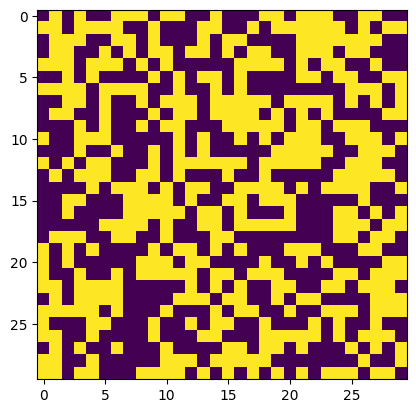

MovieWriter imagemagick unavailable; using Pillow instead.


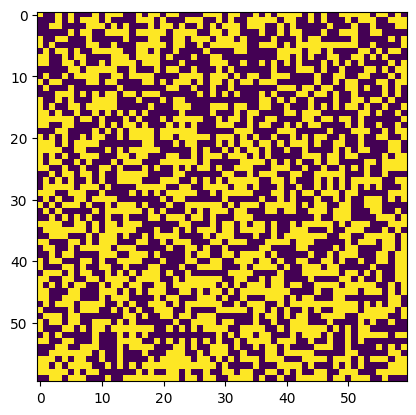

MovieWriter imagemagick unavailable; using Pillow instead.


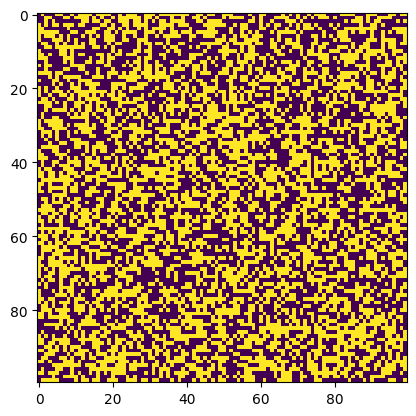

MovieWriter imagemagick unavailable; using Pillow instead.


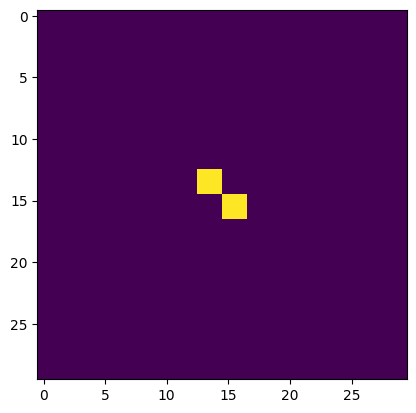

MovieWriter imagemagick unavailable; using Pillow instead.


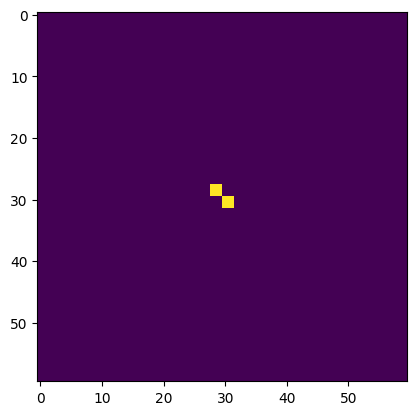

MovieWriter imagemagick unavailable; using Pillow instead.


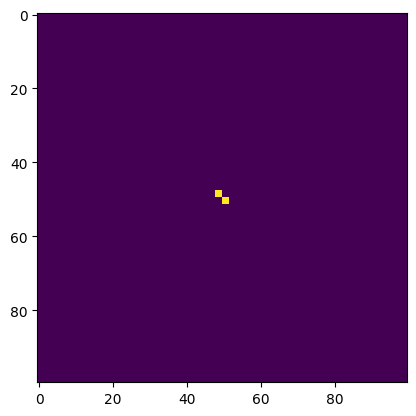

MovieWriter imagemagick unavailable; using Pillow instead.


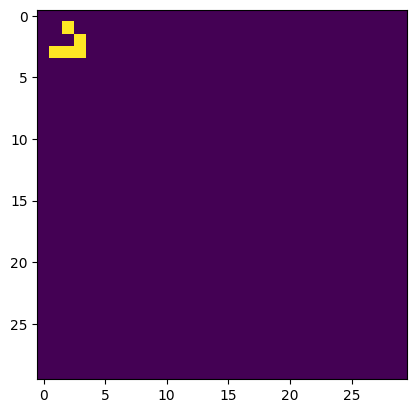

MovieWriter imagemagick unavailable; using Pillow instead.


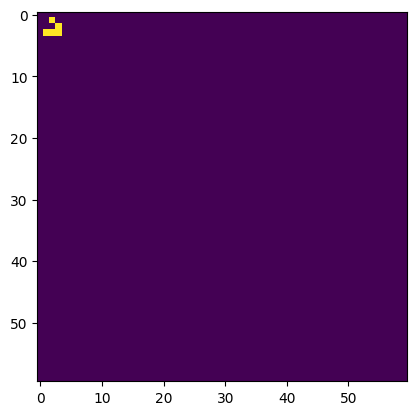

MovieWriter imagemagick unavailable; using Pillow instead.


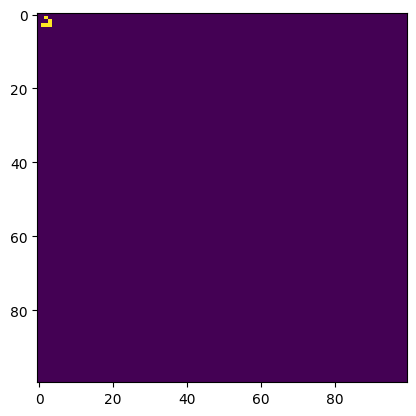

MovieWriter imagemagick unavailable; using Pillow instead.


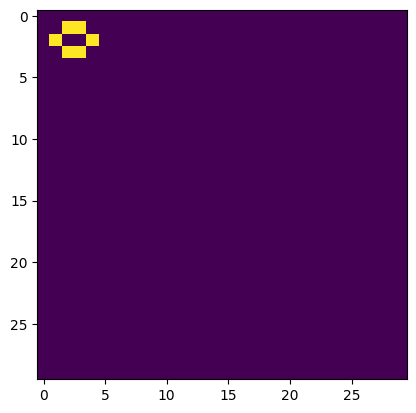

MovieWriter imagemagick unavailable; using Pillow instead.


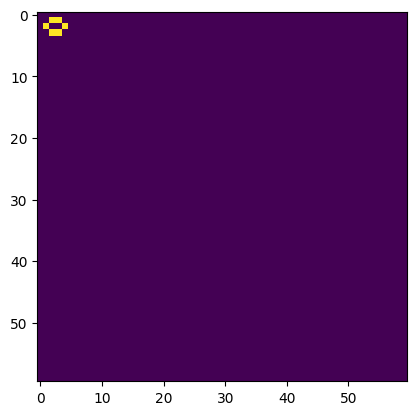

MovieWriter imagemagick unavailable; using Pillow instead.


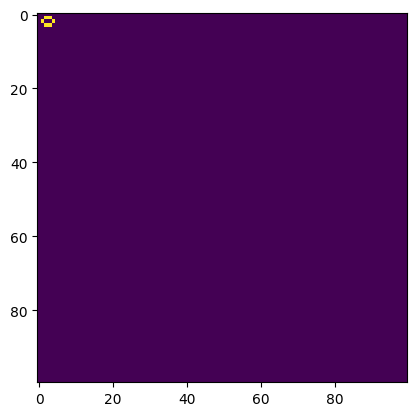

MovieWriter imagemagick unavailable; using Pillow instead.


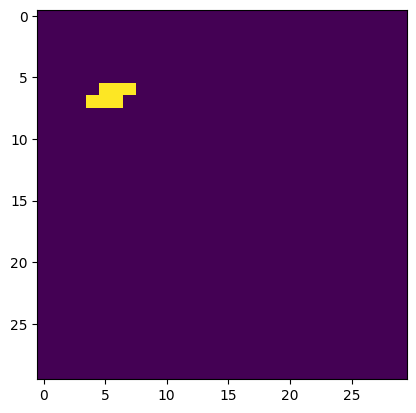

MovieWriter imagemagick unavailable; using Pillow instead.


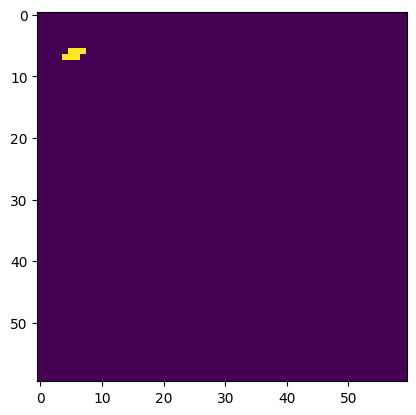

MovieWriter imagemagick unavailable; using Pillow instead.


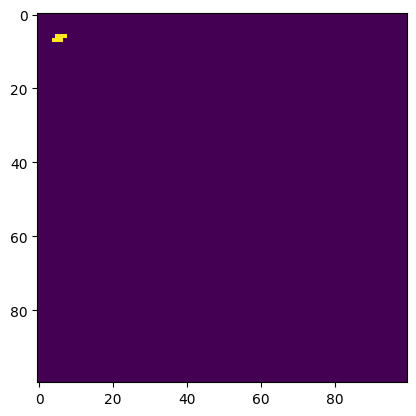

MovieWriter imagemagick unavailable; using Pillow instead.


In [3]:
# Function to update the plot for each frame of the animation
def update_plot(frame, img, grid):
    new_grid = update_grid(grid)
    img.set_array(new_grid)
    grid[:] = new_grid[:]
    return img,

nums = [30, 60, 100] #different grid dimensions
patterns = [random_pattern, beacon_pattern, glider_pattern,  beehive_pattern, toad_pattern] #list of patterns
i = 0
for pattern in patterns:
    for num in nums:
        ROWS = num
        COLS = num
        # Initialize the grid
        grid =  pattern()
        
        # Create a figure and axis
        fig, ax = plt.subplots()
        img = ax.imshow(grid, interpolation='nearest')
        
        # Update the plot using animation
        ani = animation.FuncAnimation(fig, update_plot, fargs=(img, grid), frames=200, interval=50)
        
        plt.show()
        ani.save(f'gol_animation_{pattern.__name__}_{num}.gif', writer='imagemagick', fps=10)

**3. Results and Analyses**

In [4]:
import numpy as np
import pandas as pd

# Function to analyze pattern characteristics
def analyze_pattern(pattern_func, cycles):
    grid = pattern_func()
    occupancy = []
    replication_heat = []
    for _ in range(cycles):
        grid = update_grid(grid)
        occupancy.append(np.sum(grid))
        replication_heat.append(np.sum(grid != pattern_func()))
    return {
        "Occupancy": occupancy,
        "Replication/Heat": replication_heat
    }

# Define patterns
patterns = {
    "random": random_pattern,
    "Glider": glider_pattern,
    "Beehive": beehive_pattern,
    "Toad": toad_pattern,
    "Beacon": beacon_pattern
}

# Analyze patterns
pattern_data = {}
cycles = 100
for pattern_name, pattern_func in patterns.items():
    pattern_data[pattern_name] = analyze_pattern(pattern_func, cycles)

# Convert data to DataFrame
df = pd.DataFrame(index=range(cycles))
for pattern_name, data in pattern_data.items():
    for key, values in data.items():
        df[f"{pattern_name} - {key}"] = values

# Display the DataFrame

first_df = df.iloc[:,::2]
display(first_df)
second_df = df.iloc[:,1::2]
display(second_df)


# Function to calculate frequency
def calculate_frequency(occupancy):
    seen = set()
    for i, occ in enumerate(occupancy):
        if occ.tobytes() in seen:
            return i
        seen.add(occ.tobytes())
    return None
    
# Calculate frequency for each pattern
frequencies = {}
for pattern_name, data in pattern_data.items():
    frequency = calculate_frequency(data["Occupancy"])
    frequencies[pattern_name] = frequency

# Display the DataFrame
# print("\nDataframe:\n", df)
print("\nFrequency:")
for pattern_name, frequency in frequencies.items():
    print(f"{pattern_name}: {frequency}")

,random - Occupancy,Glider - Occupancy,Beehive - Occupancy,Toad - Occupancy,Beacon - Occupancy
0,2967,5,6,6,6
1,2711,5,6,6,8
2,2670,5,6,6,6
3,2531,5,6,6,8
4,2382,5,6,6,6
...,...,...,...,...,...
95,893,5,6,6,8
96,848,5,6,6,6
97,857,5,6,6,8
98,844,5,6,6,6


,random - Replication/Heat,Glider - Replication/Heat,Beehive - Replication/Heat,Toad - Replication/Heat,Beacon - Replication/Heat
0,5004,4,0,8,2
1,4955,4,0,0,0
2,4965,8,0,8,2
3,4991,8,0,0,0
4,5035,8,0,8,2
...,...,...,...,...,...
95,4969,10,0,0,0
96,4999,10,0,8,2
97,4972,10,0,0,0
98,4958,10,0,8,2



Frequency:
random: 47
Glider: 1
Beehive: 1
Toad: 1
Beacon: 2


**Analyses**:
The random pattern exhibits fluctuating occupancy levels, with a substantial replication/heat value suggesting frequent changes in cell states. for the Glider, Beehive, and Toad patterns they showcase consistent occupancy and replication/heat metrics, indicating stable configurations. The Beacon pattern stands out with a slightly higher occupancy and replication/heat, suggesting intermittent changes. Also, while the Glider pattern demonstrates a periodic behavior with a frequency of 1, other patterns exhibit a frequency of 1 or 2, showcasing varying degrees of regularity in their configurations.


**4. Conclusion** 

our implementation and analysis of the Game of Life patterns provide valuable insights into the dynamics of cellular automata. We've successfully implemented the basic rules, explored various patterns, and analyzed their characteristics in terms of occupancy, replication, and frequency. These findings not only demonstrate the diverse behaviors exhibited by different patterns but also highlight the underlying principles governing their evolution. 